## Measuring performance

In [9]:
import numpy as np
result = np.arange(10**9).sum()

In [11]:
import dask.array as da
work = da.arange(10**9).sum()
result = work.compute()

In [13]:
%%time
np.arange(10**9).sum()

CPU times: user 2.14 s, sys: 1.66 s, total: 3.8 s
Wall time: 3.8 s


499999999500000000

In [14]:
%%timeit
np.arange(10**9).sum()

3.87 s ± 27.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
time = %timeit -o np.arange(10**9).sum()

3.85 s ± 28.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
time

<TimeitResult : 3.85 s ± 28.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [17]:
print(f"Time taken: {time.average:.4f}")

Time taken: 3.8532


In [18]:
dir(time)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_precision',
 '_repr_pretty_',
 'all_runs',
 'average',
 'best',
 'compile_time',
 'loops',
 'repeat',
 'stdev',
 'timings',
 'worst']

In [19]:
time?

Type:        TimeitResult
String form: 3.85 s ± 28.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
File:        ~/pyenv/versions/3.9.1/envs/lesson_parallel_python/lib/python3.9/site-packages/IPython/core/magics/execution.py
Docstring:  
Object returned by the timeit magic with info about the run.

Contains the following attributes :

loops: (int) number of loops done per measurement
repeat: (int) number of times the measurement has been repeated
best: (float) best execution time / number
all_runs: (list of float) execution time of each run (in s)
compile_time: (float) time of statement compilation (s)


In [20]:
time.best

3.807969180999862

In [21]:
%%timeit
da.arange(10**9).sum().compute()

775 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
work = da.arange(10**9).sum()

In [23]:
%%timeit
work.compute()

788 ms ± 28.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Memory profiling

In [24]:
!pip install memory_profiler

You should consider upgrading via the '/Users/loostrum/pyenv/versions/3.9.1/envs/lesson_parallel_python/bin/python3.9 -m pip install --upgrade pip' command.


In [25]:
from memory_profiler import memory_usage

In [26]:
import numpy as np
import dask.array as da
import matplotlib.pyplot as plt

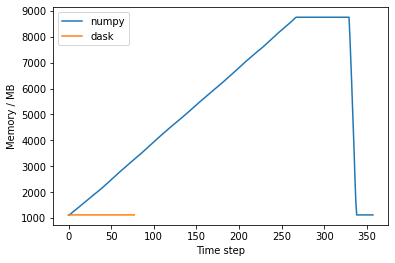

In [27]:
def sum_with_numpy():
    np.arange(10**9).sum()

def sum_with_dask():
    da.arange(10**9).sum().compute()

memory_numpy = memory_usage(sum_with_numpy, interval=.01)
memory_dask = memory_usage(sum_with_dask, interval=.01)

# plot results
plt.plot(memory_numpy, label='numpy')
plt.plot(memory_dask, label='dask')
plt.xlabel('Time step')
plt.ylabel('Memory / MB')
plt.legend()
plt.show()

In [31]:
np.arange(10).itemsize
np.arange(10).nbytes

80

In [32]:
da.arange(10**9).sum()

dask.array<sum-aggregate, shape=(), dtype=int64, chunksize=(), chunktype=numpy.ndarray>

In [33]:
da.arange(10**9)

dask.array<arange, shape=(1000000000,), dtype=int64, chunksize=(15625000,), chunktype=numpy.ndarray>

In [34]:
import psutil

In [36]:
N_physical_cores = psutil.cpu_count(logical=False)
N_logical_cores = psutil.cpu_count(logical=True)

print(f"The number of physical/logical cores is {N_physical_cores}/{N_logical_cores}")

The number of physical/logical cores is 4/8


In [39]:
x = []
for n in range(1, 15):
    time_taken = %timeit -r 1 -o da.arange(5*10**8).sum(). \
    compute(num_workers=n)
    x.append(time_taken.average)

971 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
614 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
437 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
409 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
397 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
404 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
378 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
382 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
377 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
451 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
433 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
377 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
418 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
370 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<AxesSubplot:xlabel='n'>

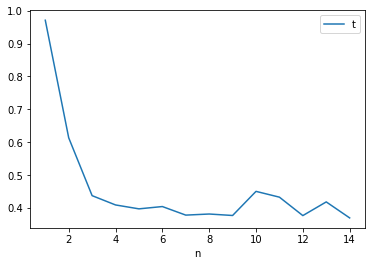

In [40]:
import pandas as pd
data = pd.DataFrame({"n": range(1, 15), "t": x})
data.set_index("n").plot()

# Lunch break until 13:30